## Meet Professor William Sharpe
An investment may make sense if we expect it to return more money than it costs. But returns are only part of the story because they are risky - there may be a range of possible outcomes. How does one compare different investments that may deliver similar results on average, but exhibit different levels of risks?

<img style="float: left ; margin: 5px 20px 5px 1px;" width="200" src="https://assets.datacamp.com/production/project_66/img/sharpe.jpeg">

Enter William Sharpe. He introduced the `reward-to-variability ratio` in 1966 that soon came to be called the `Sharpe Ratio`. It compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other. In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. A higher Sharpe ratio means that the reward will be higher for a given amount of risk. It is common to compare a specific opportunity against a benchmark that represents an entire category of investments.
The Sharpe ratio has been one of the most popular risk/return measures in finance, not least because it's so simple to use. It also helped that Professor Sharpe won a Nobel Memorial Prize in Economics in 1990 for his work on the `capital asset pricing model (CAPM)`.
The `Sharpe ratio` is usually calculated for a portfolio and uses the `risk-free interest rate` as `benchmark`. We will simplify our example and use stocks instead of a portfolio. We will also use a stock index as benchmark rather than the risk-free interest rate because both are readily available at daily frequencies and we do not have to get into converting interest rates from annual to daily frequency. Just keep in mind that you would run the same calculation with portfolio returns and your risk-free rate of choice, e.g, the `3-month Treasury Bill Rate`. 

So let's learn about the `Sharpe ratio` by calculating it for the stocks of the two tech giants Facebook and Amazon. As benchmark we'll use the `S & P 500` that measures the performance of the 500 largest stocks in the US. When we use a stock index instead of the risk-free rate, the result is called the Information Ratio and is used to benchmark the return on active portfolio management because it tells you how much more return for a given unit of risk your portfolio manager earned relative to just putting your money into a low-cost index fund.

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings to produce nice plots in a Jupyter notebook

plt.style.use('fivethirtyeight')
%matplotlib inline


In [2]:
# Reading in the stock_data

stock_data = pd.read_csv(r"C:\Users\goodn\OneDrive\Desktop\PROJECT PORTFOLIO\stock_data.csv")

# Reading in the benchmark_data

benchmark_data = pd.read_csv(r"C:\Users\goodn\OneDrive\Desktop\EXERCISE DATASET\benchmark_data.csv")


# Convert the 'date' column to datetime

stock_data['Date'] = pd.to_datetime(stock_data['Date'])
benchmark_data['Date'] = pd.to_datetime(benchmark_data['Date'])

In [3]:
# Merge both dataframes 

stock_benchmark_data = pd.merge(stock_data, benchmark_data, on='Date')

## A first glance at the data

Let's take a look at the merged data to find out how many observations and variables we have at our disposal and carry out a brief exploratory data analysis

In [4]:
# Show the first 5 rows of the merged Dataframe

stock_benchmark_data.head()

,Date,Amazon,Facebook,S & P 500
0,2016-01-04,636.989990,102.220001,2012.66
1,2016-01-05,633.789978,102.730003,2016.71
2,2016-01-06,632.650024,102.970001,1990.26
3,2016-01-07,607.940002,97.919998,1943.09
4,2016-01-08,607.049988,97.330002,1922.03


In [5]:
# Show the first 5 rows of the merged Dataframe

stock_benchmark_data.tail()

,Date,Amazon,Facebook,S & P 500
247,2016-12-23,760.590027,117.269997,2263.79
248,2016-12-27,771.400024,118.010002,2268.88
249,2016-12-28,772.130005,116.919998,2249.92
250,2016-12-29,765.150024,116.349998,2249.26
251,2016-12-30,749.869995,115.050003,2238.83


In [6]:
# Showing the shape of the merged dataframe

stock_benchmark_data.shape

(252, 4)

In [7]:
# Check for column variables name for the Transaction Dataset

stock_benchmark_data.columns

Index(['Date', 'Amazon', 'Facebook', 'S & P 500'], dtype='object')

In [8]:
# Count for unique values in each column

stock_benchmark_data.nunique()

Date         252
Amazon       251
Facebook     244
S & P 500    251
dtype: int64

In [9]:
# Detecting & counting missing/null values in the Dataset

stock_benchmark_data.isna().sum() 

Date         0
Amazon       0
Facebook     0
S & P 500    0
dtype: int64

In [10]:
# check for duplicates

stock_benchmark_data.duplicated().sum()

0

In [11]:
# Display information for the merged Dataframe

stock_benchmark_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Amazon     252 non-null    float64       
 2   Facebook   252 non-null    float64       
 3   S & P 500  252 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 9.8 KB


In [12]:
# Display summary statistics for the merged dataframe

stock_benchmark_data.describe()

,Amazon,Facebook,S & P 500
count,252.000000,252.000000,252.000000
mean,699.523135,117.035873,2094.651310
std,92.362312,8.899858,101.427615
min,482.070007,94.160004,1829.080000
25%,606.929993,112.202499,2047.060000
50%,727.875000,117.765000,2104.105000
75%,767.882492,123.902502,2169.075000
max,844.359985,133.279999,2271.720000


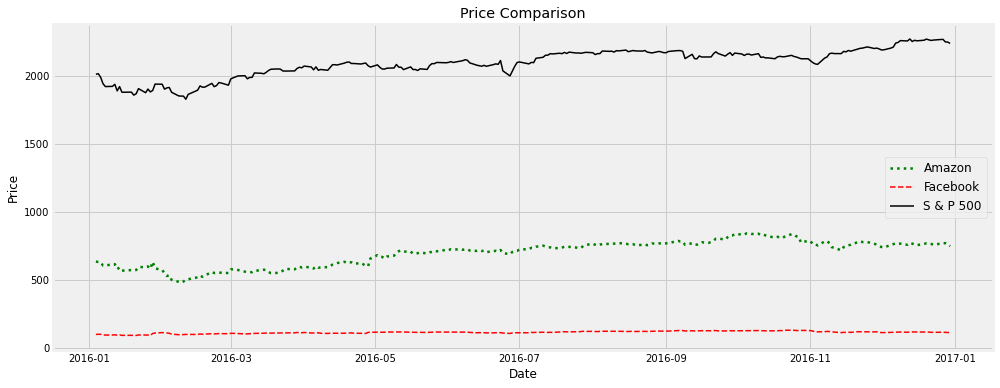

In [13]:
# Create a figure and specify the size

fig = plt.figure(figsize=(15, 6))  # Specify width and height in inches

# Plot line charts for each stock
sns.lineplot(data=stock_benchmark_data, x='Date', y='Amazon', label='Amazon', color='green', linewidth=2.5, linestyle='dotted')
sns.lineplot(data=stock_benchmark_data, x='Date', y='Facebook', label='Facebook', color='red', linewidth=1.5, linestyle='dashed')
sns.lineplot(data=stock_benchmark_data, x='Date', y='S & P 500', label='S & P 500', color='black', linewidth=1.5, linestyle='solid')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Comparison')

# Display the legend
plt.legend(fontsize='large')

# Show the plot
plt.show()

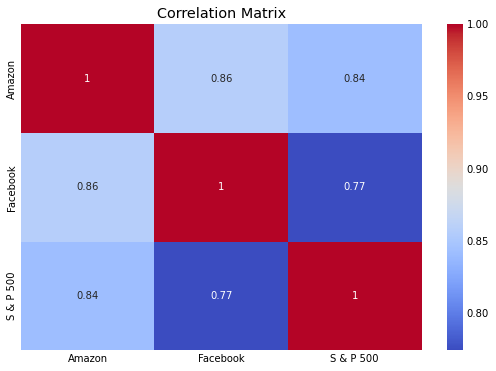

In [14]:
## Visualizing their relationship using the heatmap

# Create a correlation matrix
correlation_matrix = stock_benchmark_data[['Amazon', 'Facebook', 'S & P 500']].corr()

# Create a figure and specify the size
fig = plt.figure(figsize=(8, 6))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

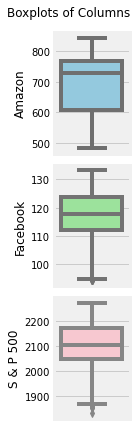

In [15]:
# Create a figure and specify the size
fig, axes = plt.subplots(3, 1, figsize=(2, 6))

# Plot a boxplot for each column to check the distribution of the values in the columns
sns.boxplot(ax=axes[0], y=stock_benchmark_data['Amazon'], color='skyblue')
axes[0].set_ylabel('Amazon')

sns.boxplot(ax=axes[1], y=stock_benchmark_data['Facebook'], color='lightgreen')
axes[1].set_ylabel('Facebook')

sns.boxplot(ax=axes[2], y=stock_benchmark_data['S & P 500'], color='pink')
axes[2].set_ylabel('S & P 500')

# Set the overall title
fig.suptitle('Boxplots of Columns')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Plotting & Summarizing daily prices for Amazon and Facebook for more context

Before we compare an investment in either `Facebook` or `Amazon` with the index of the 500 largest companies in the US, let's visualize the data, so we better understand what we're dealing with.

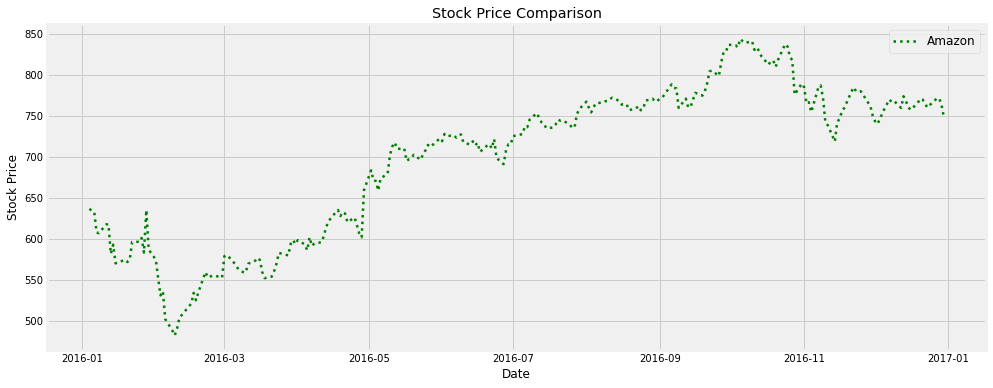

In [16]:
# visualize the stock_data

# Create a figure and specify the size

fig = plt.figure(figsize=(15, 6))  # Specify width and height in inches

# Plot the line charts for Amazon
plt.plot(stock_benchmark_data['Date'], stock_benchmark_data['Amazon'], label='Amazon',  color='green', linewidth=2.5, linestyle='dotted')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Comparison')

# Display the legend

plt.legend(fontsize='large')

# Show the plot

plt.show()

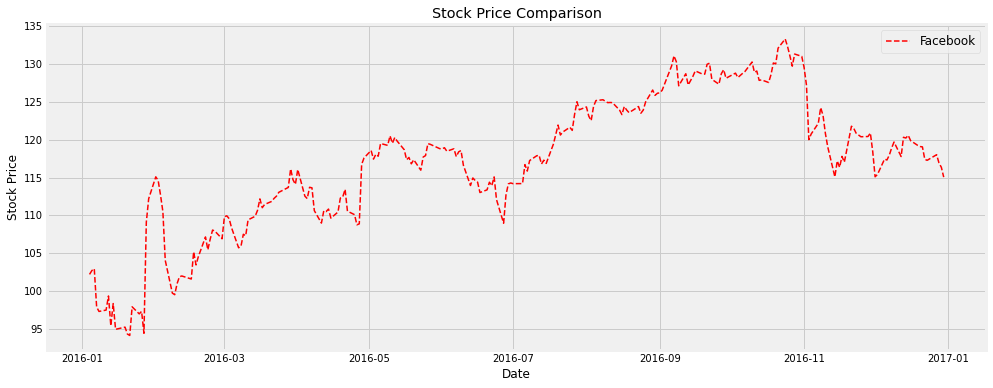

In [17]:
# Create a figure and specify the size

fig = plt.figure(figsize=(15, 6))  # Specify width and height in inches

# Plot the line charts for Facebook

plt.plot(stock_benchmark_data['Date'], stock_benchmark_data['Facebook'], label='Facebook',  color='red', linewidth=1.5, linestyle='dashed')

# Set labels and title

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Comparison')

# Display the legend

plt.legend(fontsize='large')

# Show the plot

plt.show()

## Visualize & summarize daily values for the S&P 500
<p>Let's also take a closer look at the value of the S&amp;P 500, our benchmark.</p>

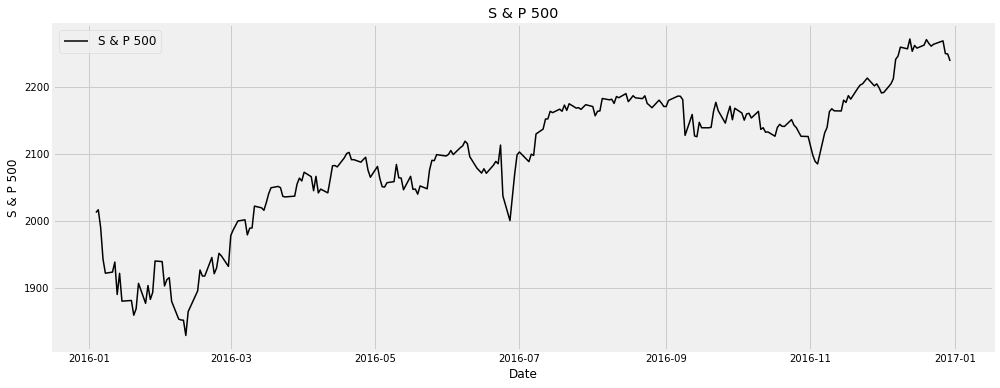

In [18]:
# Create a figure and specify the size

fig = plt.figure(figsize=(15, 6))  # Specify width and height in inches

# Plot the line charts for Facebook

plt.plot(stock_benchmark_data['Date'], stock_benchmark_data['S & P 500'], label='S & P 500',  color='black', linewidth=1.5, linestyle='solid')

# Set labels and title

plt.xlabel('Date')
plt.ylabel('S & P 500')
plt.title('S & P 500')

# Display the legend

plt.legend(fontsize='large')

# Show the plot

plt.show()

## The inputs for the Sharpe Ratio: Starting with Daily Stock Returns
The `Sharpe Ratio` uses the difference in returns between the two investment opportunities under consideration.
However, our data show the historical value of each investment, not the return. To calculate the return, we need to `calculate the percentage change in value from one day to the next`. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio. Can you already guess the result?

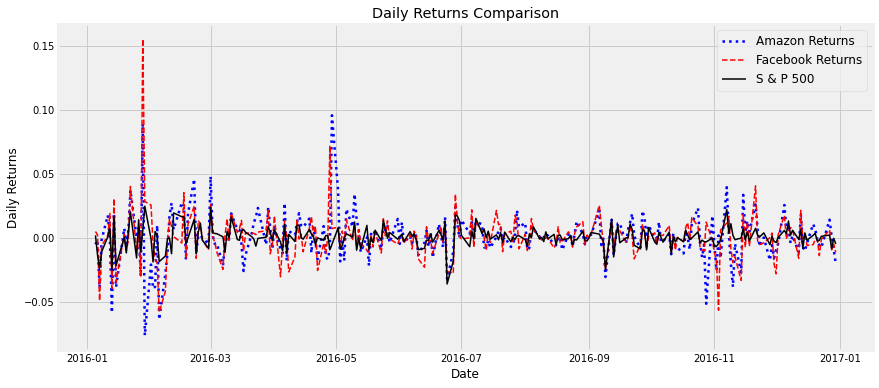

In [19]:
# Calculate the daily returns
stock_benchmark_data['Amazon_Returns'] = stock_benchmark_data['Amazon'].pct_change()
stock_benchmark_data['Facebook_Returns'] = stock_benchmark_data['Facebook'].pct_change()
stock_benchmark_data['S&P500_Returns'] = stock_benchmark_data['S & P 500'].pct_change()

# Create a figure and specify the size
fig = plt.figure(figsize=(13, 6))

# Plot line charts for each stock
sns.lineplot(data=stock_benchmark_data, x='Date', y='Amazon_Returns', label='Amazon Returns', color='blue', linewidth=2.5, linestyle='dotted')
sns.lineplot(data=stock_benchmark_data, x='Date', y='Facebook_Returns', label='Facebook Returns', color='red', linewidth=1.5, linestyle='dashed')
sns.lineplot(data=stock_benchmark_data, x='Date', y='S&P500_Returns', label='S & P 500', color='black', linewidth=1.5, linestyle='solid')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns Comparison')

# Display the legend
plt.legend(fontsize='large')

# Show the plot
plt.show()

## Calculating Excess Returns for Amazon and Facebook vs. S&P 500

Next, we need to calculate the relative performance of the `stocks` vs. the `S & P 500` benchmark. This is calculated as the difference in returns between `stock_returns` and `S&P500_returns` for each day.

In [20]:
# Calculating the Excess Return for the Stocks vs benchmark & putting them in new columns

stock_benchmark_data['Amazon_Excess_Returns'] = stock_benchmark_data['Amazon_Returns'] - stock_benchmark_data['S&P500_Returns']
stock_benchmark_data['Facebook_Excess_Returns'] = stock_benchmark_data['Facebook_Returns'] - stock_benchmark_data['S&P500_Returns']

In [21]:
# Extracting the Excess returns column for the dataset

excess_returns = stock_benchmark_data[['Date', 'Amazon_Excess_Returns', 'Facebook_Excess_Returns']]

# Rename columns

excess_returns = excess_returns.rename(columns={'Amazon_Excess_Returns': 'Amazon','Facebook_Excess_Returns': 'Facebook'})

In [22]:
# Summary Statistics for the Excess Returns columns

excess_returns.describe()

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


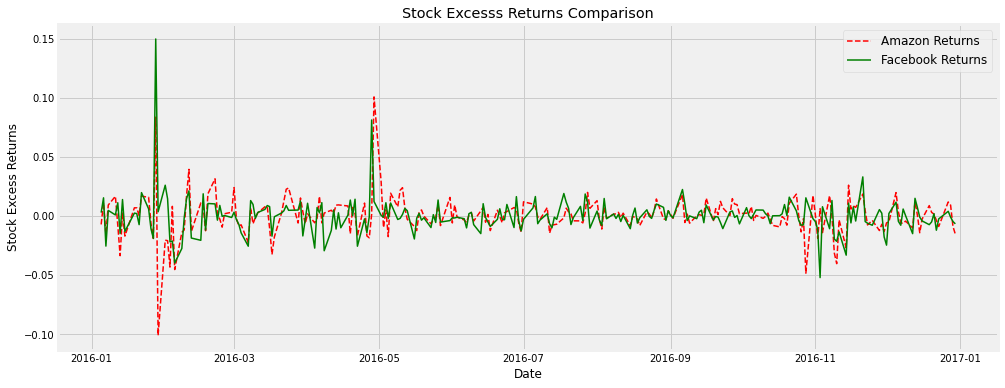

In [23]:
## Visualize the Stock returns over time

# Create a figure and specify the size

fig = plt.figure(figsize=(15, 6))  # Specify width and height in inches

# Plot the line charts for Facebook

plt.plot(excess_returns['Date'], excess_returns['Amazon'], label='Amazon Returns',  color='red', linewidth=1.5, linestyle='dashed')
plt.plot(excess_returns['Date'], excess_returns['Facebook'], label='Facebook Returns',  color='green', linewidth=1.5, linestyle='solid')

# Set labels and title

plt.xlabel('Date')
plt.ylabel('Stock Excess Returns')
plt.title('Stock Excesss Returns Comparison')


# Display the legend

plt.legend(fontsize='large')

# Show the plot

plt.show()

## The Sharpe Ratio, The Average Difference in Daily Returns Stocks vs S&P 500

Now we can finally start computing the `Sharpe Ratio`. First we need to calculate the average of the `excess_returns`. This tells us how much more or less the investment yields per day compared to the benchmark.

In [24]:
# Calculating the Average Excess Returns for the Stocks

avg_excess_returns = excess_returns[['Amazon', 'Facebook']].mean()

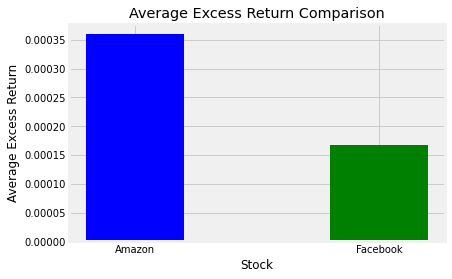

In [25]:
# Visualizing the Average Excess Returns

stocks = ['Amazon', 'Facebook']

# Define custom colors for the bars

colors = ['blue', 'green']

# Set the width of the bars

width = [0.4, 0.4]

# Creating a bar plot for mean excess returns

plt.bar(stocks, avg_excess_returns, color=colors, width=width)

# Set labels and title

plt.xlabel('Stock')
plt.ylabel('Average Excess Return')
plt.title('Average Excess Return Comparison')

# Show the plot

plt.show()

## The Sharpe Ratio, Standard Deviation of the Return Difference

It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.

Next, we calculate the `standard deviation` of the `excess_returns`. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&amp;P 500.

In [26]:
# Calculate the risk associated with stock in relation to the benchmark S & P 500

sd_excess_return = excess_returns[['Amazon', 'Facebook']].std()

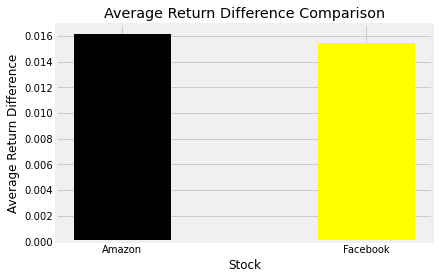

In [27]:
# Visualizing the Average Return Difference

stocks = ['Amazon', 'Facebook']

# Define custom colors for the bars

colors = ['black', 'yellow']

# Set the width of the bars

width = [0.4, 0.4]

# Creating a bar plot for mean excess returns

plt.bar(stocks, sd_excess_return, color=colors, width=width)

# Set labels and title

plt.xlabel('Stock')
plt.ylabel('Average Return Difference')
plt.title('Average Return Difference Comparison')

# Show the plot

plt.show()

## Putting it all together

Now we just need to compute the ratio of `avg_excess_returns` and `sd_excess_returns`. The result is now finally the `Sharpe ratio` and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.
The `Sharpe Ratio` is often `annualized` by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days `(5 days, 52 weeks, minus a few holidays)`: `√252`

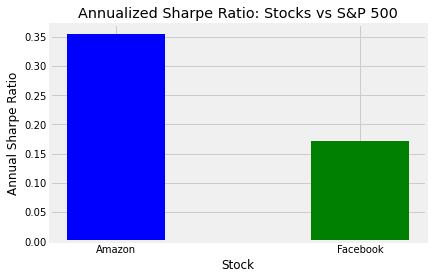

In [28]:
# calculate the daily sharpe ratio

daily_sharpe_ratio = avg_excess_returns.div(sd_excess_return)


# annualize the sharpe ratio

annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# Visualizing the Annualized Sharpe Ratio for The Stocks vs The S & P 500

# Define custom colors for the bars

colors = color = ['blue', 'green']

# Set the width of the bars

width = [0.4, 0.4]

# Data

annual_sharpe_ratio = {'Amazon': 0.354283,'Facebook': 0.172329}

plt.bar(annual_sharpe_ratio.keys(), annual_sharpe_ratio.values(), color=color, width =width)
plt.xlabel('Stock')
plt.ylabel('Annual Sharpe Ratio')
plt.title('Annualized Sharpe Ratio: Stocks vs S&P 500')

plt.show()

## 11. Conclusion

Given the two Sharpe ratios, which investment should we go for? In `2016`, Amazon had a Sharpe ratio twice as high as Facebook. `This means that an investment in Amazon returned twice as much compared to the S & P 500 for each unit of risk an investor` would have assumed. In other words, in risk-adjusted terms, `the investment in Amazon would have been more attractive`.

This difference was mostly driven by differences in `return` rather than `risk` between `Amazon` and `Facebook`. The risk of choosing `Amazon` over `FB` (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Amazon.

When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.